# Quantum computing program with ProjectQ 

## Introduction to ProjectQ
ProjectQ is an open-source software framework for quantum computing started at ETH Zuric. It aims at providing tools which facilitate inventing, implementing, testing, debugging, and running quantum algorithms using either classical hardware or actual quantum devices.

Main features: 

* Use Python as the high level language to write quantum programs
* Use various hardware and software back-ends
* FermiLib for solving quantum chemistry progmes (fermionic problems) on a quantum computer


### Compiler Framework
<img src="http://2017.projectq.ch/wordpress/wp-content/uploads/2017/03/compiler_overview.gif">


The compilation framework consists of a main compiler engine, which executes a user-defined sequence of compilation steps by sending the circuit through a chain of so-called compiler engines. Each compiler engine manipulates the circuit to, e.g., reduce the number of gates or quantum bits required to run the quantum program. Engines further down the stack become more back-end-specific and take care of the mapping of the logical circuit to the layout of the back-end.

After the circuit has passed through all compiler engines, it gets sent to the back-end. The back-end may be actual quantum hardware, a simulator run on a classical computer, a circuit drawing engine, etc.

### Back-ends
After the circuit has passed through all compiler engines, it gets sent to the back-end. The back-end may be 
* actual quantum hardware (superconducting circuits, topological qubits, ion traps, spin qubits, and photonic qubits, etc); Current supported hardward (IBM Quantum Experience: IBM’s 5-qubit quantum computer.
* simulator run on a classical computer; 
* circuit drawing engine. 

### References

https://projectq.ch/

https://arxiv.org/abs/1612.08091

https://github.com/ProjectQ-Framework/ProjectQ

## Contents of Tutorials

* Fundamental gate operations
    * NOT
    * Hadamard 
    * CNOT
* Quantum Random Number Generator

* Bell state 

* Two qubit Deutsch algorithm

In [55]:
from __future__ import print_function
#Importing projectQ gates
from projectq import MainEngine
from projectq.ops import H, NOT, CNOT, Measure
import matplotlib.pylab as plt
import numpy as np

#use simulator engine 
eng = MainEngine()

## To use IBM quantum experience backend. 
#from projectq.backends import IBMBackend
#eng = MainEngine(IBMBackend(),
#                 engine_list=projectq.setups.ibm.get_engine_list())
#To use Quantum Experience, please register an account
#    https://quantumexperience.ng.bluemix.net/qx/signup

def print_wavefunction(qureg, nqubits, mask, opt='not'):
  # print wavefunction
    eng.flush()
    #Make sure all previous commands have passed through the compilation chain.
    print("   |Psi> = ", end='')
    i=0
    for s in range(2 ** nqubits):
        bit_string = format(s, mask)
        result=eng.backend.get_amplitude(bit_string, qureg)
        if (opt.find('all')!=-1):
            print("%.1f|%s> " % (result.real,bit_string), end='')
            if (s<2**nqubits-1):
                print("+", end='')
        else:       
            if (abs(result.real)!=0.0):
                if i != 0 and result.real >0: print("+ ", end='')
                print("%.2f|%s> " % (result.real,bit_string), end='')
                i=i+1
    print()
    return

def measure_qubits(qureg):
    Measure | qureg
    eng.flush()
    i=0
    try:
        for q in qureg:
            print("   Measured Q{}: |{}>".format(i, int(q)))### multiple qubit case
            i=i+1
    except:
        print("   Measured: |{}>".format(int(qureg))) ### single qubit
    return 

(Note: This is the (slow) Python simulator.)


## Fundamental gate operations
### Initializing a two qubit state
We initialize a two qubit state: 
   
   $|\Psi\rangle = |00\rangle$

both are at |0> state.

In [57]:
# initialize variables
from projectq import MainEngine

eng = MainEngine() ## engine
nqubits=2
mask='02b'
qureg = eng.allocate_qureg(nqubits) 
## allocate 2 qubit, stored at qureg, 
# the qubit could be accessed as qureg[0], qureg[1]

print("\n*Allocate %s qubits" %nqubits)
print_wavefunction(qureg, nqubits, mask, 'all')

(Note: This is the (slow) Python simulator.)

*Allocate 2 qubits
   |Psi> = 1.0|00> +0.0|01> +0.0|10> +0.0|11> 


## NOT gate (or X gate)

* NOT gate transformation

    $|0\rangle \longrightarrow |1\rangle$

    $|1\rangle \longrightarrow |0\rangle$


* Matrix representation is 

    NOT = $\left(
    \begin{matrix}
    0 & 1 \\
    1 & 0
    \end{matrix}\right)
    $. 
This is the Pauli $\sigma_x$ matrix.

In [58]:
print("*Initial state")
print_wavefunction(qureg, nqubits, mask)
print("\n*Apply NOT gate to Q0")
NOT | qureg[0] # Syntax for gate operation is : op | qubit

print_wavefunction(qureg, nqubits, mask)

print("\n*Apply NOT gate to Q0")
NOT | qureg[0]
print_wavefunction(qureg, nqubits, mask)

*Initial state
   |Psi> = 1.00|00> 

*Apply NOT gate to Q0
   |Psi> = 1.00|10> 

*Apply NOT gate to Q0
   |Psi> = 1.00|00> 


## Hadamard (H) gate

* Hadamard transformation

    $|0\rangle \longrightarrow \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$ 

    $|1\rangle \longrightarrow \frac{1}{\sqrt{2}}(|0\rangle - |1\rangle)$ 

* The matrix representation is: 

    H = $
\frac{1}{\sqrt{2}}\left(
\begin{matrix}
1 & 1 \\
1 & -1
\end{matrix}\right)
$

* Two Hadamard gate together equals to identify

    $H\times H=I$

The circuit is 
<img src="hadamard.png">

In [18]:
print("*Initial state")
print_wavefunction(qureg, nqubits, mask)
print("\n*Apply Hadamard gate to Q0")
H | qureg[0]
print_wavefunction(qureg, nqubits, mask)
print("\n*Apply Hadamard gate to Q1")
H | qureg[1]
print_wavefunction(qureg, nqubits, mask)

print("\n*Apply Hadamard gate to Q0 and Q1 again to go back to |00> state")
H | qureg[0] 
H | qureg[1]
print_wavefunction(qureg, nqubits, mask)


*Initial state
   |Psi> = 1.00|00> 

*Apply Hadamard gate to Q0
   |Psi> = 0.71|00> + 0.71|10> 

*Apply Hadamard gate to Q1
   |Psi> = 0.50|00> + 0.50|01> + 0.50|10> + 0.50|11> 

*Apply Hadamard gate to Q0 and Q1 again to go back to |00> state
   |Psi> = 1.00|00> 


## CNOT

Control NOT: apply NOT to a qubit if the control qubit is at state |1>: 

The operation of CNOT is as follows (the first qubit is the control qubit):


$
 \quad |00\rangle \longrightarrow|00\rangle\\
\quad |01\rangle  \longrightarrow |01\rangle\\
\quad |10\rangle  \longrightarrow|11\rangle\\
\quad |11\rangle  \longrightarrow |10\rangle
$

Matrix representation of CNOT operator is: 

CNOT = $
\left(
\begin{matrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0 
\end{matrix}\right)
$

The circuit for the cnot gate is:
<img, src="cnot.png">

In [59]:
print("*Allocate 2 qubits: ")
nqubits=2
mask='02b'
qureg = eng.allocate_qureg(nqubits)

print_wavefunction(qureg, nqubits, mask)
print("\n*CNOT q0->q1")
CNOT | (qureg[0], qureg[1])  
## operate on the second qubit based on the state of the first qubit

print_wavefunction(qureg, nqubits, mask)
NOT | qureg[0]
print("\n*Apply NOT gate to q0 ")
print_wavefunction(qureg, nqubits, mask)
print("\n*CNOT q0->q1")
CNOT | (qureg[0], qureg[1])  ## operate on the second qubit based on the state of the first qubit
print_wavefunction(qureg, nqubits, mask)
print("\n*CNOT q1->q0")
CNOT | (qureg[1], qureg[0])  ## operate on the second qubit based on the state of the first qubit
print_wavefunction(qureg, nqubits, mask)
del(qureg)

*Allocate 2 qubits: 
   |Psi> = 1.00|00> 

*CNOT q0->q1
   |Psi> = 1.00|00> 

*Apply NOT gate to q0 
   |Psi> = 1.00|10> 

*CNOT q0->q1
   |Psi> = 1.00|11> 

*CNOT q1->q0
   |Psi> = 1.00|01> 


## Quantum Random Number Generator

If a qubit is in a linear superposition state:
$$
|\psi\rangle = \frac{1}{\sqrt{2}}\Big(|0\rangle + |1\rangle \Big)
$$
after measurement, it will collapse to $|0\rangle$ or $|1\rangle$, each with 50% probability. This is a natural random number generator for 0, 1. 

We could rotate the qubit back to linear superposition state using Hadamard gate: 
$$
H|0\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)\\
H|1\rangle = \frac{1}{\sqrt{2}}(|0\rangle - |1\rangle)
$$
We could do measurement-> H -> measurement -> H to get multiple random number [0, 1].

<img, src="qcrnd.png">

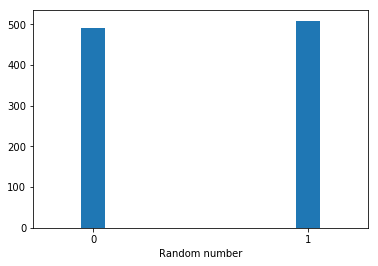

In [65]:
def Rng(m=100):
    # allocate one qubit
    q1 = eng.allocate_qubit()
    # put it in superposition
    R =[]
    for i in range(m):
        H | q1
        # measure
        Measure | q1
        R.append(int(q1))
    eng.flush()
    del(q1)
    return R
R = Rng(1000)
plt.hist(R)
plt.xlim(-0.2, 1.2)
plt.xticks([0.05, 0.95], [0, 1])
plt.xlabel("Random number")
plt.show()

## Generate random number [0, N), $2^n = N$ 

In [63]:
## Generate random number between [0, 16)
def Rng4(m=0, n=4):
    # allocate one qubit
    q1 = eng.allocate_qubit()
    R=[]
    for i in range(m):
        # single random number 
        p=0
        for j in range(n):
            H | q1
            Measure | q1
            p=2*p+int(q1)
        R.append(p)
    eng.flush()
    del(q1)
    return R
print(Rng4(10))

[4, 1, 14, 4, 3, 3, 12, 10, 11, 6]


### Exercise: generate random number using multiple qubits
We could also directly use multiple qubits. For n qubit, we could 
$$
|\psi\rangle_n =  \frac{1}{\sqrt{2}}\Big(|0\rangle + |1\rangle \Big)\times \frac{1}{\sqrt{2}}\Big(|0\rangle + |1\rangle \Big)\times  \frac{1}{\sqrt{2}}\Big(|0\rangle + |1\rangle \Big)...\\
$$
$$
|\psi\rangle_3=\frac{1}{\sqrt{8}}\Big(|000\rangle + |001\rangle + |010\rangle + |011\rangle  +|100\rangle + |101\rangle + |110\rangle + |111\rangle\Big)\\
=\frac{1}{\sqrt{8}}\Big(|0\rangle_{10} + |1\rangle_{10} + |2\rangle_{10}  +|3\rangle_{10}  +|4\rangle_{10}+|5\rangle_{10}  +|6\rangle_{10}+|7\rangle_{10}\Big)
$$
Now if we measure all the qubits simuataneously, it will collapse to one of the eight state with equal probability. 

## Bell state

The Bell states are four specific maximally entangled quantum states of two qubits.

$$
|\Psi\rangle = \frac{1}{\sqrt{2}} \Big(|00\rangle + |11\rangle\Big)
$$
The following state, 
$$
|\Psi\rangle = \frac{1}{2}\Big(|00\rangle + |01\rangle + |10\rangle + |11\rangle\Big) = \frac{1}{\sqrt{2}}\Big(|0\rangle + |1\rangle \Big)\times \frac{1}{\sqrt{2}}\Big(|0\rangle + |1\rangle \Big)
$$
is not an entangled state. 

Question: how to create such a Bell state from the initial state $|00\rangle$?



<img src="https://projectq.readthedocs.io/en/latest/_images/bellpair_circuit.png", width=250, height=250>

$$
|00\rangle \longrightarrow^H \frac{1}{\sqrt{2}}\Big(|0\rangle + |1\rangle)|0\rangle\Big) \longrightarrow^{CNOT} \frac{1}{\sqrt{2}} \Big(|00\rangle + |11\rangle\Big)
$$

In [30]:
from projectq import MainEngine
eng = MainEngine()
print("*Initial state: ")

mask='02b'
bell = eng.allocate_qureg(2)
print_wavefunction(bell, 2, mask)
print("\n*Entangle the state")
H | bell[0]
CNOT | (bell[0], bell[1])
print_wavefunction(bell, 2, mask)
print("\nMeasure the state")
Measure | bell
print_wavefunction(bell, 2, mask)
del(bell)

*Initial state: 
(Note: This is the (slow) Python simulator.)
   |Psi> = 1.00|00> 

*Entangle the state
   |Psi> = 0.71|00> + 0.71|11> 

Measure the state
   |Psi> = 1.00|00> 


#### Exercise: how to create multiple qubit entangled state
$$
|\Psi\rangle = \frac{1}{\sqrt{2}} (|00\cdots 00\rangle + |11\cdots 11\rangle )
$$

## Deutsch algorithm

In the Deutsch-Jozsa problem, we are given a black box quantum computer known as an oracle that implements some function $f:\{0,1\}^{n}\rightarrow \{0,1\}$. In other words, it takes n-digit binary values as input and produces either a 0 or a 1 as output for each such value. We are promised that the function is either constant (0 on all outputs or 1 on all outputs) or balanced (returns 1 for half of the input domain and 0 for the other half); 

$$
f(001110011) = 0 \text{ or } 1
$$

The complexity to know whether f is 1 or zero is $2^n/2 = 2^{n-1}$. 

### Quantum Superimacy 
We will show that using quantum algorithm, we are able to do this in O(n) complexity, i.e., we need the number of gate operation in the order of n. 

We assume there is a quantum Oracle

$$ U_f |x\rangle |y\rangle = |x\rangle|f(x)\oplus y\rangle $$

Then the problem could be done by the following quantum circuit (Deutsch-Jozsa algorithm): 

<img src="dja.svg">

One could check the amplitude of $|00\cdots 0\rangle$. If it is zero, then f is balanced; if it is not zero, then f is constant. 

For details, please see the wikipedia page: 
https://en.wikipedia.org/wiki/Deutsch%E2%80%93Jozsa_algorithm

### Two-qubit example (Deutsch's algorithm)
Deutsch's algorithm is a special case of the general Deutsch–Jozsa algorithm. We need to check the condition $f(0)=f(1)$. It is equivalent to check $f(0)\oplus f(1)$ (where  $\oplus$  is addition modulo 2, which can also be viewed as a quantum XOR gate implemented as a Controlled NOT gate), if zero, then $f$ is constant, otherwise $f$ is not constant.

We begin with the two-qubit state $|0\rangle |1\rangle$  and apply a Hadamard transform to each qubit. This yields

$${\frac  {1}{2}}(|0\rangle +|1\rangle )(|0\rangle -|1\rangle ).$$


We are given a quantum implementation of the function $f$ that maps $|x\rangle |y\rangle$  to $|x\rangle |f(x)\oplus y\rangle$. Applying this function to our current state we obtain


$${\frac{1}{2}}\left(|0\rangle (|f(0)\oplus 0\rangle -|f(0)\oplus 1\rangle \right)+|1\rangle \left(|f(1)\oplus 0\rangle -|f(1)\oplus 1\rangle \right)\\
=\frac{1}{2}((-1)^{f(0)}|0\rangle (|0\rangle - |1\rangle + (-1)^{-1}|1\rangle (|0\rangle - |1\rangle))\\
=(-1)^{f(0)}\frac{1}{2}\left(|0\rangle + (-1)^{f(0)\oplus f(1)}|1\rangle\right)(|0\rangle - |1\rangle)
.$$

We ignore the last bit and the global phase and therefore have the state

$$\frac {1}{\sqrt {2}}(|0\rangle +(-1)^{f(0)\oplus f(1)}|1\rangle ).$$


Applying a Hadamard transform to this state we have

$$\frac  {1}{2}(|0\rangle +|1\rangle +(-1)^{{f(0)\oplus f(1)}}|0\rangle -(-1)^{{f(0)\oplus f(1)}}|1\rangle )\\ ={\frac  {1}{2}}((1+(-1)^{{f(0)\oplus f(1)}})|0\rangle +(1-(-1)^{{f(0)\oplus f(1)}})|1\rangle ).$$

We see that if $f(0)=f(1)$, we get the final state to be
$$\frac{1}{\sqrt{2}}|0\rangle(|0\rangle -|1\rangle )$$
Otherwise, we get
$$\frac{1}{\sqrt{2}}|1\rangle(|0\rangle -|1\rangle )$$

We could also apply Hadamard gate to the second qubit, so that 
We see that if $f(0)=f(1)$, we get the final state to be

$$f(0)=f(1), \quad |\Psi\rangle = |01\rangle\quad \quad\\
f(0)\ne f(1), \quad |\Psi\rangle = |11\rangle $$

In [66]:
# initialize variables
from projectq import MainEngine
eng = MainEngine()
nqubits=2
mask='02b'
# allocate qubits
qureg = eng.allocate_qureg(nqubits)
NOT | qureg[1]

def Oracle(qureg, f=[0, 1]):
    if (f[0]==f[1]):
        print("   Constant oracle: f(0)=f(1)=%s"%(f[0]))
        if (f==1):
            NOT | qureg[1]
        return
    print("   Balanced oracle: f(0)=%s, f(1)=%s"%(f[0], f[1]))
    if f[0]==0:
        CNOT | (qureg[0], qureg[1])
    else:
        CNOT | (qureg[0], qureg[1])
        NOT | qureg[1]
    return 
print("\n*Inital state |01>: ")
print_wavefunction(qureg, nqubits, mask)
print("\n*Apply Hadamard to each qubit: ")
# apply gates
H | qureg[0]
H | qureg[1]
print_wavefunction(qureg, nqubits, mask)

print("\n*Apply Oracle: ")

Oracle(qureg, f=[0, 0])

print_wavefunction(qureg, nqubits, mask)

print("\n*Apply Hadamard to Q0 and Q1")
H | qureg[0]
H | qureg[1]
print_wavefunction(qureg, nqubits, mask)
# measure qubits
print("\n*Measure the first")
measure_qubits(qureg[0])
del(qureg)

(Note: This is the (slow) Python simulator.)

*Inital state |01>: 
   |Psi> = 1.00|01> 

*Apply Hadamard to each qubit: 
   |Psi> = 0.50|00> -0.50|01> + 0.50|10> -0.50|11> 

*Apply Oracle: 
   Constant oracle: f(0)=f(1)=0
   |Psi> = 0.50|00> -0.50|01> + 0.50|10> -0.50|11> 

*Apply Hadamard to Q0 and Q1
   |Psi> = 1.00|01> 

*Measure the first
   Measured: |0>


# Exercises

* Implementing a three qubit Deutsch's algorithm
* Implementing a four qubit Quantum Fourier Transformation according to the following quantum circuit.
<img, src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/79/Q_fourier_3qubits.png/1200px-Q_fourier_3qubits.png">